In [16]:
# cdC:\Users\mpoli\Desktop\Git\Deeplearning\Pandas_data_analysis
# jupyter nbconvert --to script week2.ipynb

import urllib.request as req # 웹에서 다운로드 할 때
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # K-평균 알고리즘
from sklearn.preprocessing import StandardScaler # 데이터 Nomalization
import pandas as pd
import os 

In [10]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
DATA_PATH = os.path.join('data') # data save folder
ColumnList = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'] # iris data의 Column List

In [11]:
def fetch_iris_data(): # data 폴더와 iris의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_iris_data(): # iris data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [12]:
fetch_iris_data()
iris = load_iris_data()

ClassList = iris['class'].unique() #class의 List (꽃 종류)

In [13]:
feature = iris[['sepal length (cm)','sepal width (cm)']]
model = KMeans(n_clusters=3, algorithm='auto') # 3개를 cluster 데이터로 군집화 할 것
model.fit(feature)
predict = pd.DataFrame(model.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,sepal length (cm),sepal width (cm),predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


그냥 점으로 되어있는것보다는 산점도 (scatter)을 이용한 방식이 더 직관적임

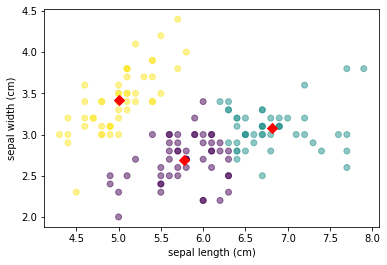

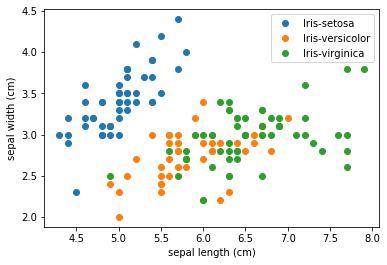

In [14]:

plt.scatter(r['sepal length (cm)'],r['sepal width (cm)'],c=r['predict'],alpha=0.5) 
# c의 값은 색을 지정할 수도 있고 지금과 같이 쓸 경우 산점도의 카테고리를 나누는 기능도 수행 할 수 있음, alpha는 색상의 투명도
centers = pd.DataFrame(model.cluster_centers_,columns=['sepal length (cm)','sepal width (cm)'])
center_x = centers['sepal length (cm)']
center_y = centers['sepal width (cm)']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


for flower in ClassList:
    flowerList = iris[iris['class']==flower]
    plt.plot(flowerList[ColumnList[0]], flowerList[ColumnList[1]], 'o')

plt.xlabel(ColumnList[0])
plt.ylabel(ColumnList[1])
plt.legend(ClassList, loc='best')

clustering 된 값과 실제 분할된 값들을 비교해 본 결과 완벽하게 분류가 되지는 않음

In [15]:
df=pd.DataFrame({'predict':predict['predict'],'class':iris['class']})
ct = pd.crosstab(df['predict'], df['class'])
ct

class,Iris-setosa,Iris-versicolor,Iris-virginica
predict,,,
0,0,38,15
1,0,12,35
2,50,0,0


위 데이터를 봤을 때 setosa는 100%, versicolor는 72%, virginica는 70% 의 정확도로 분류 된것을 알 수 있음   
데이터를 봤을 때 setosa는 100%, versicolor는 72%, virginica는 70% 의 정확도로 분류 된것을 알 수 있음  typee 
PCA를 이용해서 4개의 Column을 2개로 축소 후 clustering 해 보자

In [29]:
data = pd.DataFrame(iris[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
scaler = StandardScaler()
result = scaler.fit_transform(data)
data_scaled - pd. DataFrame(result, ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      